In [1]:
import pandas as pd

In [2]:
import re
from datetime import datetime

In [256]:
aug_df = pd.read_csv("Attendance_Aug.csv",header=3)

In [257]:
sep_df = pd.read_excel("Attendance_Sep.xlsx",header=3)

In [203]:
aug_df["2"]

,Employee ID,Employee Name,Grade,Designation,Department,Work location,2022-08-01 00:00:00,2022-08-02 00:00:00,2022-08-03 00:00:00,2022-08-04 00:00:00,...,2022-08-24 00:00:00,2022-08-25 00:00:00,2022-08-26 00:00:00,2022-08-27 00:00:00,2022-08-28 00:00:00,2022-08-29 00:00:00,2022-08-30 00:00:00,2022-08-31 00:00:00,No. of Days Work from Office,No. of Days Work from Anywhere/Home
0,12733,Sheela Gaikwad,E1,Associate Manager,FINANCE-FINANCE,PUNE_ZENSAR_CAMPUS,A,A,A,A,...,A,A,A,Saturday,Sunday,A,A,Holiday,0,21
1,14416,Vishwas Pitre,B2,Vice President,CISO-CISO,PUNE_ZENSAR_CAMPUS,A,A,A,A,...,P,A,A,Saturday,Sunday,A,P,Holiday,5,16
2,14556,Pushpal Kapadia,B1,Sr Vice President,ADS-VBU COMMON,PUNE_ZENSAR_CAMPUS,A,A,A,A,...,A,P,A,Saturday,Sunday,A,A,Holiday,1,20
3,14598,Saurabh Bobde,C1,Associate Vice President,ZENLABS-ZENLABS,PUNE_ZENSAR_CAMPUS,A,A,A,A,...,A,A,A,Saturday,Sunday,A,A,Holiday,0,21
4,14690,Kavita Bhalerao,D2,Manager,CAO-CAO,PUNE_ZENSAR_CAMPUS,A,A,A,A,...,A,A,A,Saturday,Sunday,A,A,Holiday,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,97913,Marmik Singhania,I0,Implant,ADS-VBU COMMON,PUNE_ZENSAR_CAMPUS,A,A,A,A,...,A,A,A,Saturday,Sunday,A,A,Holiday,0,21
8983,97914,Puneet Lavaniya,I0,Implant,ADS-VBU COMMON,PUNE_ZENSAR_CAMPUS,A,A,A,A,...,A,A,A,Saturday,Sunday,A,A,Holiday,0,21
8984,97915,Drishti Motwani,I0,Implant,ADS-VBU COMMON,PUNE_ZENSAR_CAMPUS,A,A,A,A,...,A,A,A,Saturday,Sunday,A,A,Holiday,0,21
8985,97916,Pooja Raskar,IT,Intern,HR-BP HR,PUNE_ZENSAR_CAMPUS,A,A,A,A,...,A,A,A,Saturday,Sunday,A,A,Holiday,0,21


In [146]:
sep_df

,Employee ID,Employee Name,Grade,Designation,Department,Work location,2022-09-01 00:00:00,2022-09-02 00:00:00,2022-09-03 00:00:00,2022-09-04 00:00:00,...,2022-09-16 00:00:00,2022-09-17 00:00:00,2022-09-18 00:00:00,2022-09-19 00:00:00,2022-09-20 00:00:00,2022-09-21 00:00:00,2022-09-22 00:00:00,2022-09-23 00:00:00,No. of Days Work from Office,No. of Days Work from Anywhere/Home
0,12733,Sheela Gaikwad,E1,Associate Manager,FINANCE-FINANCE,PUNE_ZENSAR_CAMPUS,A,A,Saturday,Sunday,...,A,Saturday,Sunday,A,A,A,A,A,0,17
1,14416,Vishwas Pitre,B2,Vice President,CISO-CISO,PUNE_ZENSAR_CAMPUS,A,A,Saturday,Sunday,...,P,Saturday,Sunday,A,P,A,A,A,4,13
2,14556,Pushpal Kapadia,B1,Sr Vice President,ADS-VBU COMMON,PUNE_ZENSAR_CAMPUS,A,A,Saturday,Sunday,...,A,Saturday,Sunday,A,P,P,P,A,6,11
3,14598,Saurabh Bobde,C1,Associate Vice President,ZENLABS-ZENLABS,PUNE_ZENSAR_CAMPUS,A,A,Saturday,Sunday,...,A,Saturday,Sunday,A,A,A,A,A,0,17
4,14690,Kavita Bhalerao,D2,Manager,CAO-CAO,PUNE_ZENSAR_CAMPUS,A,A,Saturday,Sunday,...,A,Saturday,Sunday,A,A,A,A,A,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8540,97914,Puneet Lavaniya,I0,Implant,ADS-VBU COMMON,PUNE_ZENSAR_CAMPUS,A,A,Saturday,Sunday,...,A,Saturday,Sunday,A,A,A,A,A,0,17
8541,97915,Drishti Motwani,I0,Implant,ADS-VBU COMMON,PUNE_ZENSAR_CAMPUS,A,A,Saturday,Sunday,...,A,Saturday,Sunday,A,A,A,A,A,0,17
8542,97916,Pooja Raskar,IT,Intern,HR-BP HR,PUNE_ZENSAR_CAMPUS,A,A,Saturday,Sunday,...,A,Saturday,Sunday,A,A,A,A,A,0,17
8543,97917,Isha Alamchandani,IT,Intern,HR-BP HR,PUNE_ZENSAR_CAMPUS,A,A,Saturday,Sunday,...,A,Saturday,Sunday,A,A,A,A,A,0,17


In [144]:
len(aug_df['Work location'].unique())

53

In [145]:
len(sep_df['Work location'].unique())

39

In [235]:
tag_data = pd.read_excel(r"Attendance_tagging.xlsx",sheet_name=[0,1])

In [236]:
tag_data

{0:                  Unnamed: 0 Unnamed: 1
 0           FINANCE-FINANCE    FINANCE
 1                 CISO-CISO   CORP DEV
 2            ADS-VBU COMMON        DAS
 3           ZENLABS-ZENLABS    ZENLABS
 4                   CAO-CAO   CORP DEV
 ..                      ...        ...
 59                      TTG        TTG
 60              ADS-SUPPORT        DAS
 61     M3BI-VBU COMMON-M3BI       M3BI
 62       ADS-SUPPORT COMMON        DAS
 63  M3BI-TALENT ACQUISITION       M3BI
 
 [64 rows x 2 columns],
 1:                       PUNE_ZENSAR_CAMPUS  Pune Campus
 0                     PUNE_ZENSAR_E_PARK   Pune Epark
 1    PUNE_ZENSAR_EON 1st Floor_Cluster C     Pune EON
 2    PUNE_ZENSAR_EON 1st Floor_Cluster E     Pune EON
 3   PUNE_ZENSAR_EON 2nd Floor_ Cluster C     Pune EON
 4                        PUNE_ZENSAR_EON     Pune EON
 5         HYDERABAD_DLF 1st Floor_ZENSAR    Hyderabad
 6         HYDERABAD_DLF 9th Floor_ZENSAR    Hyderabad
 7                  BENGALURU_RMZ1_ZENSAR    Ban

In [100]:
dep_tag=pd.DataFrame(tag_data[0])

In [101]:
work_tag = pd.DataFrame(tag_data[1])

In [102]:
work_tag = work_tag.shift(periods=1)

In [103]:
dep_tag.rename(columns={'Unnamed: 0' :'Department','Unnamed: 1':'Tag'}, inplace=True )

In [104]:
work_tag.iloc[0,0]=work_tag.columns[0]
work_tag.iloc[0,1]=work_tag.columns[1]

In [105]:
work_tag=work_tag.rename(columns={work_tag.columns[0]:'Work location',work_tag.columns[1]:'Tag'})

In [240]:
df=pd.read_excel("Tagging.xlsx",sheet_name=[0,1])

In [244]:
work_tag=df[0]
dep_tag=df[1]

In [106]:
def dfs_save(df_list, sheet_list, file_name):
    writer = pd.ExcelWriter(file_name,engine='xlsxwriter')   
    for dataframe, sheet in zip(df_list, sheet_list):
        dataframe.to_excel(writer, sheet_name=sheet,index=False)   
    writer.save()

dfs = [work_tag, dep_tag]
sheets = ['worklocationtagging','departmenttagging']    

dfs_save(dfs, sheets, 'Tagging.xlsx')

In [247]:
def transform_data(df):
    #df=pd.read_excel(path,header=3)
    #replacing the values
    
    df = df.replace(['Saturday','Sunday','Holiday',"A",'E1', 'E2', 'F2', 'F1','F3', 'G1', 'G2', 'I0', 'G0', 'N0', 'M0', 'M3B', 'S0', 'R0','IT'],0)
    df = df.replace(['P','B2', 'B1', 'C1', 'D2', 'C2', 'D1','A2','A1'],1)
    df = df.replace(["OA ","AO "],1)
    
    #Work Location Tagging
    for i in range(len(work_tag)):
        df=df.replace(work_tag.loc[i,"Work location"],work_tag.loc[i,"Tag"])
    
    #Department Tagging
    for i in range(len(dep_tag)):
        df=df.replace(dep_tag.loc[i,"Department"],dep_tag.loc[i,"Tag"])
    
    #Changing Date format
    for col in df.columns:
        date = re.search(r'\d{4}-\d{2}-\d{2}', str(col))
        if date:
            res = datetime.strptime(date.group(), '%Y-%m-%d').date()
            month = res.strftime("%b-%d")
            df.rename(columns={col:month},inplace=True)
    #Dropping unnecessary columns
    df=df.drop(["Employee ID","Employee Name","Designation","No. of Days Work from Office","No. of Days Work from Anywhere/Home","Grade"],axis=1)
    
    #Aggregating the rows
    new_df = pd.DataFrame(df.groupby(["Work location","Department"]).agg("sum")).reset_index()
    date_cols=new_df.columns[2:].tolist()
    #Unpivoting the columns into rows
    final_df = pd.melt(new_df,id_vars=["Work location","Department"],value_vars=[i for i in date_cols],var_name='Date',value_name='No.of Presents')
    return final_df

In [248]:
aug_df=transform_data(aug_df)
sep_df=transform_data(sep_df)

In [249]:
aug_sep_df=pd.concat([aug_df,sep_df])

In [250]:
aug_sep_df

,Work location,Department,Date,No.of Presents
0,ATLANTA_US,DAS,Aug-01,0
1,AUSTRIA_CLIENT,DAS,Aug-01,0
2,Bangalore,CORP DEV,Aug-01,4
3,Bangalore,CORP DEV-CIO,Aug-01,0
4,Bangalore,DAS,Aug-01,0
...,...,...,...,...
2111,UK_ZENSAR,DAS,Sep-23,0
2112,UK_ZENSAR,DFS,Sep-23,0
2113,US_CLIENT,DAS,Sep-23,0
2114,US_ZENSAR,DAS,Sep-23,0


In [251]:
new_df = pd.DataFrame(aug_sep_df.groupby(["Work location","Department"]))

In [252]:
com_list=[]

In [253]:
for i in range(len(new_df)):
    if sum(new_df[1][i]["No.of Presents"])>=40:
        com_list.append(new_df[1][i])

In [255]:
com_list[12]

,Work location,Department,Date,No.of Presents
71,Pune Campus,DAS,Aug-01,7
199,Pune Campus,DAS,Aug-02,14
327,Pune Campus,DAS,Aug-03,9
455,Pune Campus,DAS,Aug-04,14
583,Pune Campus,DAS,Aug-05,8
711,Pune Campus,DAS,Aug-06,0
839,Pune Campus,DAS,Aug-07,0
967,Pune Campus,DAS,Aug-08,7
1095,Pune Campus,DAS,Aug-09,17
1223,Pune Campus,DAS,Aug-10,13


In [184]:
pun_com = aug_sep_df.loc[(aug_sep_df["Work location"]=='Pune Campus')&(aug_sep_df["Department"]=="CORP DEV")&(aug_sep_df["Grade"]==0)]

In [185]:
pun_com

,Work location,Department,Grade,Date,No.of Presents
96,Pune Campus,CORP DEV,0,Aug-01,4
276,Pune Campus,CORP DEV,0,Aug-02,7
456,Pune Campus,CORP DEV,0,Aug-03,4
636,Pune Campus,CORP DEV,0,Aug-04,7
816,Pune Campus,CORP DEV,0,Aug-05,4
996,Pune Campus,CORP DEV,0,Aug-06,0
1176,Pune Campus,CORP DEV,0,Aug-07,0
1356,Pune Campus,CORP DEV,0,Aug-08,3
1536,Pune Campus,CORP DEV,0,Aug-09,10
1716,Pune Campus,CORP DEV,0,Aug-10,10


In [ ]:
df.loc[(df['Work_location']=='Pune Campus') & (df['Department']=='FINANCE')& (df['Grade']==)]

In [179]:
import re
from datetime import datetime

In [180]:
for col in df.columns:
    date = re.search(r'\d{4}-\d{2}-\d{2}', col)
    if date:
        res = datetime.strptime(date.group(), '%Y-%m-%d').date()
        month = res.strftime("%b-%d")
        df.rename(columns={col:month},inplace=True)

In [38]:
df.head()

,Employee ID,Employee Name,Grade,Designation,Aug-01,Aug-02,Aug-03,Aug-04,Aug-05,Aug-06,...,Aug-26,Aug-27,Aug-28,Aug-29,Aug-30,Aug-31,No. of Days Work from Office,No. of Days Work from Anywhere/Home,Department,Work_location
0,12733,Sheela Gaikwad,0,Associate Manager,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,FINANCE,Pune Campus
1,14416,Vishwas Pitre,1,Vice President,0,0,0,0,0,0,...,0,0,0,0,1,0,5,16,CORP DEV,Pune Campus
2,14556,Pushpal Kapadia,1,Sr Vice President,0,0,0,0,0,0,...,0,0,0,0,0,0,1,20,DAS,Pune Campus
3,14598,Saurabh Bobde,1,Associate Vice President,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,ZENLABS,Pune Campus
4,14690,Kavita Bhalerao,1,Manager,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,CORP DEV,Pune Campus


In [39]:
df=df.drop(["Employee ID","Employee Name","Designation","No. of Days Work from Office","No. of Days Work from Anywhere/Home"],axis=1)

In [40]:
df.head()

,Grade,Aug-01,Aug-02,Aug-03,Aug-04,Aug-05,Aug-06,Aug-07,Aug-08,Aug-09,...,Aug-24,Aug-25,Aug-26,Aug-27,Aug-28,Aug-29,Aug-30,Aug-31,Department,Work_location
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,FINANCE,Pune Campus
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,CORP DEV,Pune Campus
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,DAS,Pune Campus
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ZENLABS,Pune Campus
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CORP DEV,Pune Campus


In [41]:
date_cols=df.columns[1:31].to_list()

In [42]:
date_cols

['Aug-01',
 'Aug-02',
 'Aug-03',
 'Aug-04',
 'Aug-05',
 'Aug-06',
 'Aug-07',
 'Aug-08',
 'Aug-09',
 'Aug-10',
 'Aug-11',
 'Aug-12',
 'Aug-13',
 'Aug-14',
 'Aug-15',
 'Aug-16',
 'Aug-17',
 'Aug-18',
 'Aug-19',
 'Aug-20',
 'Aug-21',
 'Aug-22',
 'Aug-23',
 'Aug-24',
 'Aug-25',
 'Aug-26',
 'Aug-27',
 'Aug-28',
 'Aug-29',
 'Aug-30',
 'Aug-31',
 'Department',
 'Work_location']

In [186]:
new_df=pd.DataFrame(df.groupby(["Work location","Department","Grade"]).agg("sum")).reset_index()

In [187]:
new_df.columns

Index(['Work location', 'Department', 'Grade', 'Aug-01', 'Aug-02', 'Aug-03',
       'Aug-04', 'Aug-05', 'Aug-06', 'Aug-07', 'Aug-08', 'Aug-09', 'Aug-10',
       'Aug-11', 'Aug-12', 'Aug-13', 'Aug-14', 'Aug-15', 'Aug-16', 'Aug-17',
       'Aug-18', 'Aug-19', 'Aug-20', 'Aug-21', 'Aug-22', 'Aug-23', 'Aug-24',
       'Aug-25', 'Aug-26', 'Aug-27', 'Aug-28', 'Aug-29', 'Aug-30', 'Aug-31'],
      dtype='object')

In [188]:
new_df

,Work location,Department,Grade,Aug-01,Aug-02,Aug-03,Aug-04,Aug-05,Aug-06,Aug-07,...,Aug-22,Aug-23,Aug-24,Aug-25,Aug-26,Aug-27,Aug-28,Aug-29,Aug-30,Aug-31
0,ATLANTA_US,ADS-INSURANCE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ATLANTA_US,KSL-RETAIL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUSTRIA_CLIENT,ADS-UN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUSTRIA_CLIENT,ADS-UN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BANGALORE_ZENSAR,CISCO-CISCO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,US_ZENSAR,US BFS-VBU COMMON,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,WESTBOROUGH_ZENSAR,CIS-SERVICES-EMERGING & UTILITIES,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
590,WESTBOROUGH_ZENSAR,CIS-SERVICES-EMERGING & UTILITIES,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
591,WESTBOROUGH_ZENSAR,CIS-SERVICES-VBU COMMON-COMMON,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
new_df.loc[new_df['Aug-30']>20]

,Work location,Department,Grade,Aug-01,Aug-02,Aug-03,Aug-04,Aug-05,Aug-06,Aug-07,...,Aug-22,Aug-23,Aug-24,Aug-25,Aug-26,Aug-27,Aug-28,Aug-29,Aug-30,Aug-31
366,PUNE_ZENSAR_CAMPUS,CIO-CIO,0,4,6,4,4,4,0,0,...,9,18,22,15,9,3,3,8,24,3
401,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,3,5,4,5,1,0,0,...,8,20,20,21,14,3,3,14,23,0


In [191]:
aug_df=pd.melt(new_df,id_vars=["Work location","Department","Grade"],value_vars=[i for i in date_cols],var_name='Date',value_name='No.of Presents')

In [193]:
aug_df.loc[aug_df['No.of Presents']>1]

,Work location,Department,Grade,Date,No.of Presents
70,BENGALURU_RMZ1_ZENSAR,CIO-CIO,0,Aug-01,4
98,BENGALURU_RMZ1_ZENSAR,HR-IMPLANTS,0,Aug-01,2
349,PUNE_ZENSAR_CAMPUS,ADS-MFG,0,Aug-01,6
366,PUNE_ZENSAR_CAMPUS,CIO-CIO,0,Aug-01,4
401,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Aug-01,3
...,...,...,...,...,...
17653,PUNE_ZENSAR_EON 1st Floor_Cluster C,ADS-BANKING,0,Aug-30,2
17668,PUNE_ZENSAR_EON 1st Floor_Cluster E,ADS-MFG,0,Aug-30,2
17693,PUNE_ZENSAR_E_PARK,ADS-BANKING,0,Aug-30,4
18139,PUNE_ZENSAR_CAMPUS,ADS-MFG,0,Aug-31,3


In [194]:
train_df=aug_df.loc[(aug_df['Work location']=='PUNE_ZENSAR_CAMPUS') & (aug_df['Department']=='FINANCE-FINANCE') & (aug_df['Grade']==0)]

In [195]:
train_df

,Work location,Department,Grade,Date,No.of Presents
401,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Aug-01,3
994,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Aug-02,5
1587,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Aug-03,4
2180,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Aug-04,5
2773,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Aug-05,1
3366,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Aug-06,0
3959,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Aug-07,0
4552,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Aug-08,9
5145,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Aug-09,7
5738,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Aug-10,9


In [7]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

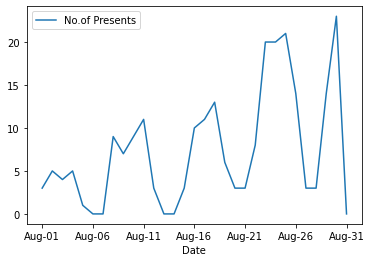

In [197]:
train_df.plot.line(x='Date',y='No.of Presents')

In [198]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

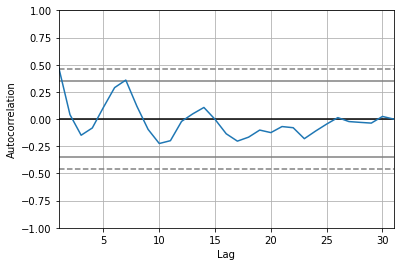

In [199]:
autocorrelation_plot(train_df['No.of Presents'])

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [59]:
p,d,q = 5,1,0

In [60]:
model = ARIMA(train_df['No.of Presents'],order=(p,d,q))

c:\users\vn59575\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\vn59575\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An u

In [61]:
model_fit=model.fit()

In [62]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.No.of Presents   No. Observations:                   30
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -94.366
Method:                       css-mle   S.D. of innovations              5.501
Date:                Fri, 07 Oct 2022   AIC                            202.732
Time:                        15:49:12   BIC                            212.541
Sample:                             1   HQIC                           205.870
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1253      0.402      0.312      0.755      -0.662       0.913
ar.L1.D.No.of Presents    -0.2041      0.279     -0.733      0.464      -0.750       0.342
ar.L2.D.No.of Presents    -0.5250      0.224     -2.341      0.019      -0.964      -0.085
ar.L3.D.No.of Presents    -0.4505      0.215     -2.094      0.036      -0.872      -0.029
ar.L4.D.No.of Presents    -0.3217      0.241     -1.336      0.182      -0.794       0.150
ar.L5.D.No.of Presents    -0.2403      0.278     -0.864      0.388      -0.786       0.305
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5977           -0.9700j            1.1394           -0.1621
AR.2            0.5977           +0.9700j            1.1394            0.1621
AR.3           -1.5435           -0.0000j            1.5435           -0.5000
AR.4           -0.4954           -1.3533j            1.4411           -0.3058
AR.5           -0.4954           +1.3533j            1.4411            0.3058
-----------------------------------------------------------------------------
"""

In [202]:
sep_df = transform_data("Forecasting_sep.xlsx")

In [203]:
sep_df

,Work location,Department,Grade,Date,No.of Presents
0,BANGALORE_ZENSAR,CISCO-CISCO,0,Sep-01,0
1,BENGALURU EMBASSY ICON_ZENSAR,ADS-INSURANCE,0,Sep-01,0
2,BENGALURU EMBASSY ICON_ZENSAR,ADS-SUPPORT,0,Sep-01,0
3,BENGALURU EMBASSY ICON_ZENSAR,KSL-RETAIL,0,Sep-01,0
4,BENGALURU_CESSNA_ZENSAR,ADS-BANKING,0,Sep-01,0
...,...,...,...,...,...
11794,UK_ZENSAR,CIS-SERVICES-BANKING,0,Sep-23,0
11795,UK_ZENSAR,CIS-SERVICES-BANKING,1,Sep-23,0
11796,US_CLIENT,CISCO-CISCO,0,Sep-23,0
11797,US_ZENSAR,ADS-INSURANCE,0,Sep-23,0


In [204]:
test_df=sep_df[(sep_df['Work location']=='PUNE_ZENSAR_CAMPUS') & (sep_df['Department']=='FINANCE-FINANCE') & (sep_df['Grade']==0)]

In [205]:
test_df

,Work location,Department,Grade,Date,No.of Presents
363,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Sep-01,13
876,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Sep-02,9
1389,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Sep-03,0
1902,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Sep-04,0
2415,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Sep-05,9
2928,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Sep-06,15
3441,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Sep-07,17
3954,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Sep-08,18
4467,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Sep-09,5
4980,PUNE_ZENSAR_CAMPUS,FINANCE-FINANCE,0,Sep-10,0


In [206]:
train_data = train_df['No.of Presents'].tolist()

In [207]:
test_data=test_df['No.of Presents'].tolist()

In [239]:
history = train_data + test_data[0:16]

In [240]:
history

[3,
 5,
 4,
 5,
 1,
 0,
 0,
 9,
 7,
 9,
 11,
 3,
 0,
 0,
 3,
 10,
 11,
 13,
 6,
 3,
 3,
 8,
 20,
 20,
 21,
 14,
 3,
 3,
 14,
 23,
 0,
 13,
 9,
 0,
 0,
 9,
 15,
 17,
 18,
 5,
 0,
 0,
 12,
 23,
 18,
 20,
 15]

In [19]:
model=ARIMA(history,order=(0,1,1))

NameError: name 'ARIMA' is not defined

In [231]:
model_fit=model.fit()

In [232]:
pred=model_fit.forecast()

(array([4.32469871]), array([5.82912456]), array([[-7.10017548, 15.7495729 ]]))

In [243]:
test=test_data[16:]

In [244]:
test

[0, 0, 13, 20, 21, 22, 11]

In [22]:
predictions=[]

In [23]:
for i in range(len(test)):
    model=ARIMA(history,order=(0,1,1))
    model_fit = model.fit()
    pred = model_fit.forecast()
    seppred = int(pred[0][0])
    predictions.append(seppred)
    obs = test[i]
    history.append(obs)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [248]:
predictions

[8, 5, 10, 16, 21, 19, 12]

In [249]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))

In [250]:
rmse

4.20883424647321

In [251]:
test

[0, 0, 13, 20, 21, 22, 11]

In [219]:
predictions

[4, 14, 21, 16, 14, 8, 5, 12, 17, 20, 18, 12]

In [2]:
aug_sep_data=pd.read_csv(r"sep_aug_data.csv")

In [5]:
aug_sep_data=aug_sep_data.drop(["Unnamed: 0","Grade"],axis=1)

In [14]:
aug_sep_data.set_index(['Date'],inplace=True)

In [16]:
aug_sep_data.head(10)

,No Of Presents
Date,
Aug-01,37
Aug-02,99
Aug-03,55
Aug-04,95
Aug-05,38
Aug-06,0
Aug-07,0
Aug-08,58
Aug-09,144


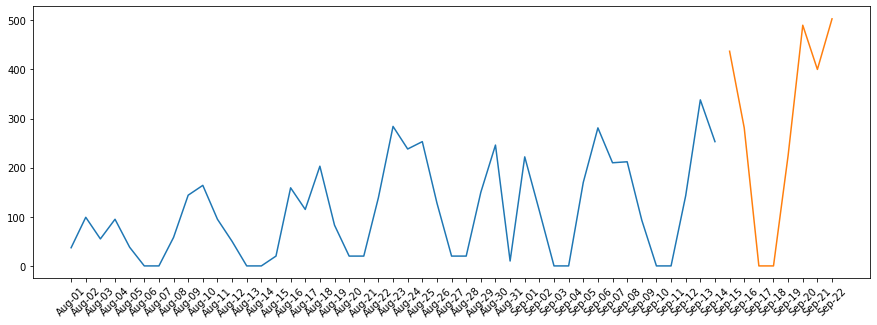

In [107]:
plt.figure(figsize=(15,5))
train = aug_sep_data[:45]
test = aug_sep_data[45:]
plt.plot(train)
plt.plot(test)
plt.xticks(rotation=45)
plt.show()

In [108]:
test

,No Of Presents
Date,
Sep-15,437
Sep-16,281
Sep-17,0
Sep-18,0
Sep-19,225
Sep-20,490
Sep-21,400
Sep-22,503


In [109]:
history=train['No Of Presents'].to_list()

In [110]:
test=test['No Of Presents'].tolist()

In [111]:
from statsmodels.tsa.arima.model import ARIMA

In [112]:
history

[37,
 99,
 55,
 95,
 38,
 0,
 0,
 58,
 144,
 164,
 95,
 50,
 0,
 0,
 20,
 159,
 115,
 203,
 83,
 20,
 20,
 139,
 284,
 238,
 253,
 128,
 20,
 20,
 150,
 246,
 10,
 222,
 112,
 0,
 0,
 170,
 281,
 210,
 212,
 93,
 0,
 0,
 143,
 338,
 253]

In [113]:
predictions=[]

In [114]:
for i in range(len(test)):
    model=sm.tsa.arima.ARIMA(history,order=(5,1,0))
    model_fit = model.fit()
    pred = model_fit.forecast()
    seppred = int(pred[0])
    predictions.append(seppred)
    obs = test[i]
    history.append(obs)

In [115]:
predictions

[170, 237, 168, 42, 120, 234, 521, 314]

In [116]:
test

[437, 281, 0, 0, 225, 490, 400, 503]

In [117]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [118]:
rmse=sqrt(mean_squared_error(test,predictions))
rmse

169.60837243485358

In [53]:
r2_score(predictions,test)

-0.34546067483826004

In [65]:
from pmdarima.arima import auto_arima

In [70]:
arima_model = auto_arima(aug_sep_data,start_p=0,start_q=0)

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -249.224
Date:                Wed, 19 Oct 2022   AIC                            504.448
Time:                        15:31:17   BIC                            509.732
Sample:                             0   HQIC                           506.397
                                 - 43                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    101.9723     20.310      5.021      0.000      62.165     141.780
ma.L1          0.4339      0.123      3.524      0.000       0.193       0.675
sigma2      6304.5896   2188.635      2.881      0.004    2014.943    1.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.68   Prob(JB):                         0.17
Heteroskedasticity (H):               3.40   Skew:                             0.54
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
forecast=model.get_forecast(steps=10)
pred_df = forecast.conf_int()
pred_df['pred'] = forecast.predicted_mean
pred_df.columns = ['lower', 'upper', 'pred']
pred_df

AttributeError: 'ARIMA' object has no attribute 'get_forecast'

In [72]:
arima_model.predict()

c:\users\vn59575\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


53    503.0
54    503.0
55    503.0
56    503.0
57    503.0
58    503.0
59    503.0
60    503.0
61    503.0
62    503.0
dtype: float64

In [30]:
df=pd.read_csv("TransformedData.csv")

In [31]:
df.head(10)

,Unnamed: 0,Employee ID,Employee Name,Grade,Designation,Aug-01,Aug-02,Aug-03,Aug-04,Aug-05,...,Aug-26,Aug-27,Aug-28,Aug-29,Aug-30,Aug-31,No. of Days Work from Office,No. of Days Work from Anywhere/Home,Department,Work_location
0,0,12733,Sheela Gaikwad,0,Associate Manager,0,0,0,0,0,...,0,0,0,0,0,0,0,21,FINANCE,Pune Campus
1,1,14416,Vishwas Pitre,1,Vice President,0,0,0,0,0,...,0,0,0,0,1,0,5,16,CORP DEV,Pune Campus
2,2,14556,Pushpal Kapadia,1,Sr Vice President,0,0,0,0,0,...,0,0,0,0,0,0,1,20,DAS,Pune Campus
3,3,14598,Saurabh Bobde,1,Associate Vice President,0,0,0,0,0,...,0,0,0,0,0,0,0,21,ZENLABS,Pune Campus
4,4,14690,Kavita Bhalerao,1,Manager,0,0,0,0,0,...,0,0,0,0,0,0,0,21,CORP DEV,Pune Campus
5,5,16177,Shubha Kumar,1,Vice President,0,0,0,0,0,...,0,0,0,0,0,0,1,20,CORP DEV,Pune Campus
6,6,18346,Iilan Mayandi,1,Sr Program Manager,0,0,0,0,0,...,0,0,0,0,0,0,0,21,DAS,Pune Campus
7,7,18347,Prasad Deshpande,1,Sr Vice President,0,0,0,0,0,...,0,0,0,0,0,0,0,21,DAS,Pune Campus
8,8,18480,Deepali Belsare,1,Project Manager,0,0,0,0,0,...,0,0,0,0,0,0,0,21,DAS,Pune Campus
9,9,18629,Avinash Kale,1,Sr Vice President,0,0,0,0,0,...,0,0,0,0,0,0,1,20,DAS,Pune Campus


In [23]:
len(df['Work_location'].unique())

40

In [11]:
df1=pd.read_excel("Attendance_tagging.xlsx",header=0)

In [43]:
df1

,Department,Tag
0,FINANCE-FINANCE,FINANCE
1,CISO-CISO,CORP DEV
2,ADS-VBU COMMON,DAS
3,ZENLABS-ZENLABS,ZENLABS
4,CAO-CAO,CORP DEV
...,...,...
59,TTG,TTG
60,ADS-SUPPORT,DAS
61,M3BI-VBU COMMON-M3BI,M3BI
62,ADS-SUPPORT COMMON,DAS


In [34]:
df=df.drop(['Unnamed: 0'],axis=1)

In [35]:
df

,Employee ID,Employee Name,Grade,Designation,Aug-01,Aug-02,Aug-03,Aug-04,Aug-05,Aug-06,...,Aug-26,Aug-27,Aug-28,Aug-29,Aug-30,Aug-31,No. of Days Work from Office,No. of Days Work from Anywhere/Home,Department,Work_location
0,12733,Sheela Gaikwad,0,Associate Manager,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,FINANCE,Pune Campus
1,14416,Vishwas Pitre,1,Vice President,0,0,0,0,0,0,...,0,0,0,0,1,0,5,16,CORP DEV,Pune Campus
2,14556,Pushpal Kapadia,1,Sr Vice President,0,0,0,0,0,0,...,0,0,0,0,0,0,1,20,DAS,Pune Campus
3,14598,Saurabh Bobde,1,Associate Vice President,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,ZENLABS,Pune Campus
4,14690,Kavita Bhalerao,1,Manager,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,CORP DEV,Pune Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,97913,Marmik Singhania,0,Implant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,DAS,Pune Campus
8983,97914,Puneet Lavaniya,0,Implant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,DAS,Pune Campus
8984,97915,Drishti Motwani,0,Implant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,DAS,Pune Campus
8985,97916,Pooja Raskar,0,Intern,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,HR,Pune Campus


In [42]:
nums=[18,22,16,24,14]
for i,j in enumerate(nums):
    print(f'{i} :  {j}')

0 :  18
1 :  22
2 :  16
3 :  24
4 :  14
